In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

books = pd.read_csv('Books.csv')
ratings = pd.read_csv('Ratings.csv')
users = pd.read_csv('Users.csv')

c:\Python\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [2]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [5]:
print(books.isnull().sum())
print(users.isnull().sum())
print(ratings.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
User-ID          0
Location         0
Age         110762
dtype: int64
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [6]:
books['Book-Author'].value_counts(ascending=False)


Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
                      ... 
Paul Chappuis Bragg      1
Peter Morton Coan        1
V.C. ANDREWS             1
Lydia Vellaccio          1
Mary R.  Shefferman      1
Name: Book-Author, Length: 102023, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Book-Author'>

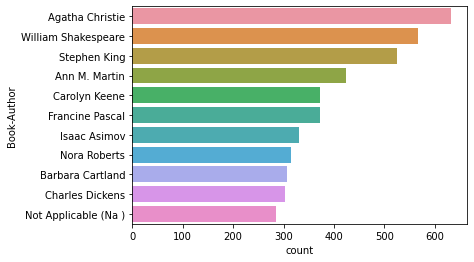

In [7]:
sns.countplot(data=books, y='Book-Author',
              order=books['Book-Author'].value_counts(ascending=False).iloc[:11].index)



In [8]:
books['Year-Of-Publication'].value_counts()

2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
2037        1
1931        1
1378        1
1924        1
1934        1
Name: Year-Of-Publication, Length: 202, dtype: int64

c:\Python\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Book-Rating', ylabel='Density'>

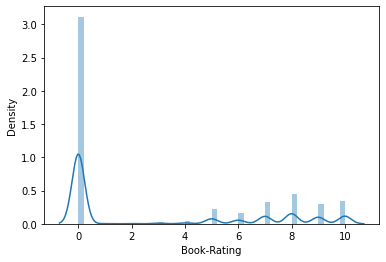

In [9]:
sns.distplot(ratings['Book-Rating'])

## Popularity Based recommendation system


In [10]:
book_ratings = ratings.merge(books,on = 'ISBN')
book_ratings.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [11]:
number_of_ratings = book_ratings.groupby('Book-Title').count()['Book-Rating'].reset_index()
number_of_ratings.rename(columns = {'Book-Rating' : 'Number_of_ratings'}, inplace = True)
number_of_ratings

,Book-Title,Number_of_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [12]:
avg_ratings = book_ratings.groupby(
    'Book-Title').mean()['Book-Rating'].reset_index()
avg_ratings.rename(columns = {'Book-Rating': 'avg_ratings'}, inplace=True)
avg_ratings


,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [13]:
popularity_df = number_of_ratings.merge(avg_ratings,on= 'Book-Title')
popularity_df


,Book-Title,Number_of_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [14]:
popularity_df = popularity_df[popularity_df['Number_of_ratings'] >= 250].sort_values('avg_ratings', ascending= False)
popularity_df


,Book-Title,Number_of_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [15]:
popularity_df =  popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[
    ['Book-Title', 'Book-Author', 'Image-URL-M', 'Number_of_ratings', 'avg_ratings']]
popularity_df

,Book-Title,Book-Author,Image-URL-M,Number_of_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
...,...,...,...,...,...
716,Vinegar Hill (Oprah's Book Club (Paperback)),A. Manette Ansay,http://images.amazon.com/images/P/0380730138.0...,265,2.245283
717,Whispers,BELVA PLAIN,http://images.amazon.com/images/P/0440216745.0...,286,2.199301
727,Presumed Innocent,Scott Turow,http://images.amazon.com/images/P/0446359866.0...,294,2.139456
733,Isle of Dogs,Patricia Cornwell,http://images.amazon.com/images/P/0425182908.0...,288,2.000000


## Collaborative Filtering Recommender

In [16]:
x = book_ratings.groupby('User-ID').count()['Book-Rating'] >= 200
users_wtih_ratings = x[x].index

In [17]:
filtered_ratings = book_ratings[book_ratings['User-ID'].isin(users_wtih_ratings)]
filtered_ratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
5,23768,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
7,28523,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
15,77940,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
16,81977,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
...,...,...,...,...,...,...,...,...,...,...
1030883,275970,1880837927,0,The Theology of the Hammer,Millard Fuller,1994,Smyth &amp; Helwys Publishing,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...,http://images.amazon.com/images/P/1880837927.0...
1030884,275970,188717897X,0,The Ordeal of Integration: Progress and Resent...,Orlando Patterson,1998,Civitas Book Publisher,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...,http://images.amazon.com/images/P/188717897X.0...
1030885,275970,1888889047,0,Pushcart's Complete Rotten Reviews &amp; Rejec...,Bill Henderson,1998,Pushcart Press,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...,http://images.amazon.com/images/P/1888889047.0...
1030886,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,Mike Tougias,2002,Capital Books (VA),http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...,http://images.amazon.com/images/P/1931868123.0...


In [18]:
y = book_ratings.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [19]:
filtered_ratings = filtered_ratings[filtered_ratings['Book-Title'].isin(famous_books)]

In [20]:
final_rating_pt = filtered_ratings.pivot_table(
    index='Book-Title', columns='User-ID', values='Book-Rating')


In [21]:
final_rating_pt.fillna(0, inplace = True)

In [22]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_similarity(final_rating_pt).shape

(2444, 2444)

In [23]:
similarity_score = cosine_similarity(final_rating_pt)
similarity_score[0]

array([1.       , 0.       , 0.       , ..., 0.0554792, 0.       ,
       0.       ])

In [24]:
def recommend(book_name):
    #Fetch Index
    index = np.where(final_rating_pt.index == book_name)[0][0]
    similar_items = sorted(
        list(enumerate(similarity_score[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    for i in similar_items:
        print(final_rating_pt.index[i[0]])


In [25]:
recommend('The Da Vinci Code')

Angels &amp; Demons
Doing Good
Touching Evil
TickTock
The Arraignment


In [26]:
books['Image-URL-M'][0]

'http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg'

In [28]:
import pickle
pickle.dump(popularity_df,open('popularity_df','wb'))